# **EXPLORATORY DATA ANALYSIS OF H1-B VISA DATASET 2019 :**


###  IMPORTING LIBRARIES ##

In [1]:
import numpy as np 
import re
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly
import getpass 
import sys
from sklearn.model_selection import train_test_split


tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [2]:
df = pd.read_csv(r"C:\Users\Arpit Kumar Lariya\OneDrive - iitr.ac.in\Desktop\H-1B_Disclosure_Data_FY2019.csv", low_memory = False)
df.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,08-04-2016,30-04-2019,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,14-07-2017,13-05-2019,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,23-08-2017,30-04-2019,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,22-12-2017,20-08-2019,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,10-01-2018,15-04-2019,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [338]:
df.shape

(1048547, 260)

In [339]:
# df = df[:200000]
# df.shape

In [340]:
pd.set_option('display.max_columns', None)
df.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,PERIOD_OF_EMPLOYMENT_START_DATE,PERIOD_OF_EMPLOYMENT_END_DATE,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,EMPLOYER_PROVINCE,EMPLOYER_PHONE,EMPLOYER_PHONE_EXT,NAICS_CODE,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_LAW_FIRM_BUSINESS_NAME,AGENT_ATTORNEY_ADDRESS1,AGENT_ATTORNEY_ADDRESS2,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,AGENT_ATTORNEY_POSTAL_CODE,AGENT_ATTORNEY_COUNTRY,AGENT_ATTORNEY_PROVINCE,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,STATE_OF_HIGHEST_COURT,NAME_OF_HIGHEST_STATE_COURT,WORKSITE_WORKERS_1,SECONDARY_ENTITY_1,SECONDARY_ENTITY_BUSINESS_NAME_1,WORKSITE_ADDRESS1_1,WORKSITE_ADDRESS2_1,WORKSITE_CITY_1,WORKSITE_COUNTY_1,WORKSITE_STATE_1,WORKSITE_POSTAL_CODE_1,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,PREVAILING_WAGE_1,PW_UNIT_OF_PAY_1,PW_TRACKING_NUMBER_1,PW_WAGE_LEVEL_1,PW_OES_YEAR_1,PW_OTHER_SOURCE_1,PW_NON-OES_YEAR_1,PW_SURVEY_PUBLISHER_1,PW_SURVEY_NAME_1,WORKSITE_WORKERS_2,SECONDARY_ENTITY_2,SECONDARY_ENTITY_BUSINESS_NAME_2,WORKSITE_ADDRESS1_2,WORKSITE_ADDRESS2_2,WORKSITE_CITY_2,WORKSITE_COUNTY_2,WORKSITE_STATE_2,WORKSITE_POSTAL_CODE_2,WAGE_RATE_OF_PAY_FROM_2,WAGE_RATE_OF_PAY_TO_2,WAGE_UNIT_OF_PAY_2,PREVAILING_WAGE_2,PW_UNIT_OF_PAY_2,PW_TRACKING_NUMBER_2,PW_WAGE_LEVEL_2,PW_OES_YEAR_2,PW_OTHER_SOURCE_2,PW_NON-OES_YEAR_2,PW_SURVEY_PUBLISHER_2,PW_SURVEY_NAME_2,WORKSITE_WORKERS_3,SECONDARY_ENTITY_3,SECONDARY_ENTITY_BUSINESS_NAME_3,WORKSITE_ADDRESS1_3,WORKSITE_ADDRESS2_3,WORKSITE_CITY_3,WORKSITE_COUNTY_3,WORKSITE_STATE_3,WORKSITE_POSTAL_CODE_3,WAGE_RATE_OF_PAY_FROM_3,WAGE_RATE_OF_PAY_TO_3,WAGE_UNIT_OF_PAY_3,PREVAILING_WAGE_3,PW_UNIT_OF_PAY_3,PW_TRACKING_NUMBER_3,PW_WAGE_LEVEL_3,PW_OES_YEAR_3,PW_OTHER_SOURCE_3,PW_NON-OES_YEAR_3,PW_SURVEY_PUBLISHER_3,PW_SURVEY_NAME_3,WORKSITE_WORKERS_4,SECONDARY_ENTITY_4,SECONDARY_ENTITY_BUSINESS_NAME_4,WORKSITE_ADDRESS1_4,WORKSITE_ADDRESS2_4,WORKSITE_CITY_4,WORKSITE_COUNTY_4,WORKSITE_STATE_4,WORKSITE_POSTAL_CODE_4,WAGE_RATE_OF_PAY_FROM_4,WAGE_RATE_OF_PAY_TO_4,WAGE_UNIT_OF_PAY_4,PREVAILING_WAGE_4,PW_UNIT_OF_PAY_4,PW_TRACKING_NUMBER_4,PW_WAGE_LEVEL_4,PW_OES_YEAR_4,PW_OTHER_SOURCE_4,PW_NON-OES_YEAR_4,PW_SURVEY_PUBLISHER_4,PW_SURVEY_NAME_4,WORKSITE_WORKERS_5,SECONDARY_ENTITY_5,SECONDARY_ENTITY_BUSINESS_NAME_5,WORKSITE_ADDRESS1_5,WORKSITE_ADDRESS2_5,WORKSITE_CITY_5,WORKSITE_COUNTY_5,WORKSITE_STATE_5,WORKSITE_POSTAL_CODE_5,WAGE_RATE_OF_PAY_FROM_5,WAGE_RATE_OF_PAY_TO_5,WAGE_UNIT_OF_PAY_5,PREVAILING_WAGE_5,PW_UNIT_OF_PAY_5,PW_TRACKING_NUMBER_5,PW_WAGE_LEVEL_5,PW_OES_YEAR_5,PW_OTHER_SOURCE_5,PW_NON-OES_YEAR_5,PW_SURVEY_PUBLISHER_5,PW_SURVEY_NAME_5,WORKSITE_WORKERS_6,SECONDARY_ENTITY_6,SECONDARY_ENTITY_BUSINESS_NAME_6,WORKSITE_ADDRESS1_6,WORKSITE_ADDRESS2_6,WORKSITE_CITY_6,WORKSITE_COUNTY_6,WORKSITE_STATE_6,WORKSITE_POSTAL_CODE_6,WAGE_RATE_OF_PAY_FROM_6,WAGE_RATE_OF_PAY_TO_6,WAGE_UNIT_OF_PAY_6,PREVAILING_WAGE_6,PW_UNIT_OF_PAY_6,PW_TRACKING_NUMBER_6,PW_WAGE_LEVEL_6,PW_OES_YEAR_6,PW_OTHER_SOURCE_6,PW_NON-OES_YEAR_6,PW_SURVEY_PUBLISHER_6,PW_SURVEY_NAME_6,WORKSITE_WORKERS_7,SECONDARY_ENTITY_7,SECONDARY_ENTITY_BUSINESS_NAME_7,WORKSITE_ADDRESS1_7,WORKSITE_ADDRESS2_7,WORKSITE_CITY_7,WORKSITE_COUNTY_7,WORKSITE_STATE_7,WORKSITE_POSTAL_CODE_7,WAGE_RATE_OF_PAY_FROM_7,WAGE_RATE_OF_PAY_TO_7,WAGE_UNIT_OF_PAY_7,PREVAILING_WAGE_7,PW_UNIT_OF_PAY_7,PW_TRACKING_NUMBER_7,PW_WAGE_LEVEL_7,PW_OES_YEAR_7,PW_OTHER_SOURCE_7,PW_NON-OES_YEAR_7,PW_SURVEY_PUBLISHER_7,PW_SURVEY_NAME_7,WORKSITE_WORKERS_8,SECONDARY_ENTITY_8,SECONDARY_ENTITY_BUSINESS_NAME_8,WORKSITE_ADDRESS1_8,WORKSITE_ADDRESS2_8,WORKSITE_CITY_8,WORKSITE_COUNTY_8,WORKSITE_STATE_8,WORKSITE_POSTAL_CODE_8,WAGE_RATE_OF_PAY_FROM_8,WAGE_RATE_OF_PAY_TO_8,WAGE_UNIT_OF_PAY_8,PREVAI

In [341]:
df = df[df.VISA_CLASS == 'H-1B']

In [342]:
df.EMPLOYER_COUNTRY.value_counts()

UNITED STATES OF AMERICA    621467
CANADA                          25
INDIA                            3
GUATEMALA                        2
ALBANIA                          2
TURKEY                           1
AFGHANISTAN                      1
AUSTRALIA                        1
Name: EMPLOYER_COUNTRY, dtype: int64

In [343]:
df= df[df.EMPLOYER_COUNTRY == 'UNITED STATES OF AMERICA']

In [344]:
df.apply(lambda x:len(x.unique()))

CASE_NUMBER           621467
CASE_STATUS                4
CASE_SUBMITTED        246357
DECISION_DATE           7418
ORIGINAL_CERT_DATE      1663
                       ...  
WILLFUL_VIOLATOR           3
SUPPORT_H1B                3
STATUTORY_BASIS            4
MASTERS_EXEMPTION          2
PUBLIC_DISCLOSURE          4
Length: 260, dtype: int64

In [345]:
df.isnull().sum()[df.isnull().sum() > 0]

ORIGINAL_CERT_DATE        600216
JOB_TITLE                      1
SOC_CODE                       4
SOC_TITLE                      4
TOTAL_WORKER_POSITIONS         2
                           ...  
WILLFUL_VIOLATOR              22
SUPPORT_H1B               390907
STATUTORY_BASIS           413515
MASTERS_EXEMPTION         620175
PUBLIC_DISCLOSURE           4906
Length: 244, dtype: int64

###  SELECTING RELEVANT FEATURES -

In [346]:
to_select = ['CASE_NUMBER', 'CASE_STATUS', 'EMPLOYER_NAME', 'SECONDARY_ENTITY_1', 'AGENT_REPRESENTING_EMPLOYER',
             'PERIOD_OF_EMPLOYMENT_START_DATE', 'JOB_TITLE', 'SOC_TITLE', 'SOC_CODE', 'NAICS_CODE', 'FULL_TIME_POSITION',
             'NEW_CONCURRENT_EMPLOYMENT', 'PREVAILING_WAGE_1', 'CONTINUED_EMPLOYMENT','CHANGE_PREVIOUS_EMPLOYMENT', 
             'CHANGE_EMPLOYER', 'AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B', 'WILLFUL_VIOLATOR',
             'WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1']

In [347]:
df1 = df[to_select]
df1.head()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,PERIOD_OF_EMPLOYMENT_START_DATE,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,FULL_TIME_POSITION,NEW_CONCURRENT_EMPLOYMENT,PREVAILING_WAGE_1,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1
6,I-200-18289-307616,WITHDRAWN,MH SUB I LLC,NaN,Y,03/07/2019,DIRECTOR OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,454111.0,Y,0.0,97365.0,0,1.0,0.0,0.0,N,NaN,N,100000,Year
7,I-200-19015-877040,WITHDRAWN,"KIIP, INC.",N,Y,27-05-2019,HEAD OF BUSINESS DEVELOPMENT,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541990.0,Y,0.0,131685.0,1,0.0,0.0,0.0,N,NaN,N,131685,Year
8,I-200-19031-693896,WITHDRAWN,"SUNSHINE SACHS & ASSOCIATES WEST, LLC",N,Y,23-02-2019,"ACCOUNT DIRECTOR, SOCIAL MEDIA",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541820.0,Y,0.0,97365.0,1,0.0,0.0,0.0,N,NaN,N,99750,Year
9,I-200-19056-659352,WITHDRAWN,"SOLAREDGE TECHNOLOGIES, INC.",N,Y,01-09-2019,PRODUCT MARKETING MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334413.0,Y,0.0,126901.0,0,0.0,0.0,0.0,N,NaN,N,130000,Year
10,I-200-19066-002723,WITHDRAWN,SOULSIGHT,N,Y,06-09-2019,ASSOCIATE ACCOUNT STRATEGY MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541430.0,Y,0.0,47549.0,0,0.0,0.0,0.0,N,NaN,N,50000,Year


In [348]:
df1.dtypes

CASE_NUMBER                         object
CASE_STATUS                         object
EMPLOYER_NAME                       object
SECONDARY_ENTITY_1                  object
AGENT_REPRESENTING_EMPLOYER         object
PERIOD_OF_EMPLOYMENT_START_DATE     object
JOB_TITLE                           object
SOC_TITLE                           object
SOC_CODE                            object
NAICS_CODE                         float64
FULL_TIME_POSITION                  object
NEW_CONCURRENT_EMPLOYMENT          float64
PREVAILING_WAGE_1                  float64
CONTINUED_EMPLOYMENT                object
CHANGE_PREVIOUS_EMPLOYMENT         float64
CHANGE_EMPLOYER                    float64
AMENDED_PETITION                   float64
H-1B_DEPENDENT                      object
SUPPORT_H1B                         object
WILLFUL_VIOLATOR                    object
WAGE_RATE_OF_PAY_FROM_1             object
WAGE_UNIT_OF_PAY_1                  object
dtype: object

### DISTRIBUTION OF VISA CASES WITH THE COMPANIES -

<AxesSubplot:>

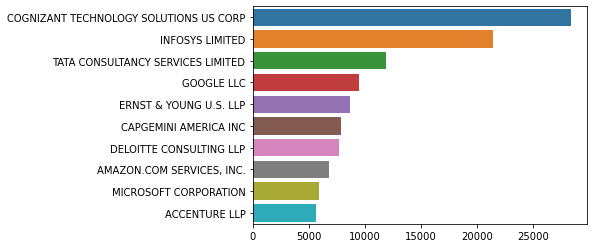

In [349]:
emp = df1['EMPLOYER_NAME'].value_counts()[:10]
sns.barplot(x= emp.values, y = emp.index)

### * PIE chart showing different cases of CASE-STATUS :

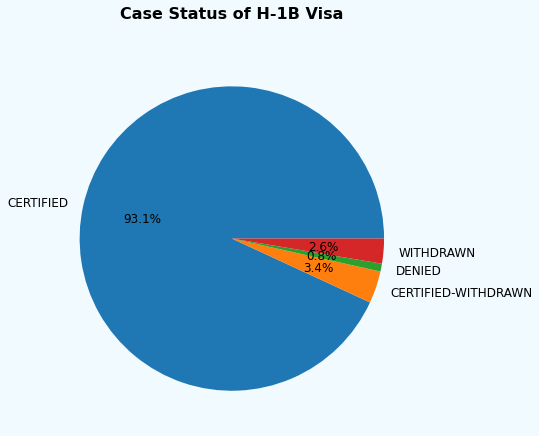

In [350]:
fig = plt.figure(figsize=(7,7))

fig.patch.set_facecolor('#F1FBFF')
fig.patch.set_alpha(1.0)

sums = df1.CASE_NUMBER.groupby(df1.CASE_STATUS).count()
pie(sums, labels = sums.index, autopct='%.1f%%', textprops={'fontsize': 12})

ax1 = plt.title('Case Status of H-1B Visa',
          fontsize = 16,
          fontweight = 'heavy',
          loc = 'center', 
          pad = 30); #semi-colon for hide text before graph output

<AxesSubplot:title={'center':'H1B Petitions by Case Status'}>

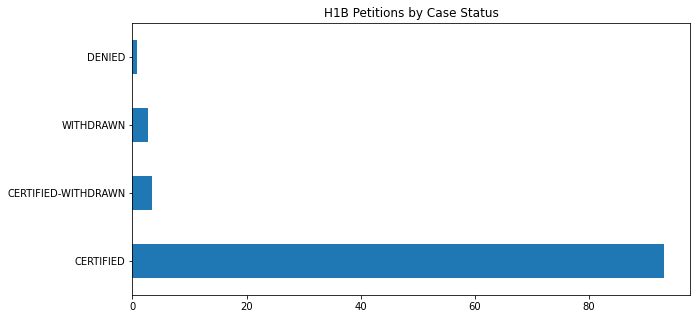

In [351]:
plt.rcParams["figure.figsize"] = (10,5)
(df1.CASE_STATUS.value_counts(normalize=True)*100).plot(kind='barh',title='H1B Petitions by Case Status')

###  What are the top OCCUPATIONS of the H1-B's being filed by the employers ?

<AxesSubplot:title={'center':'Occupation of the top h1b companies'}, ylabel='SOC_TITLE'>

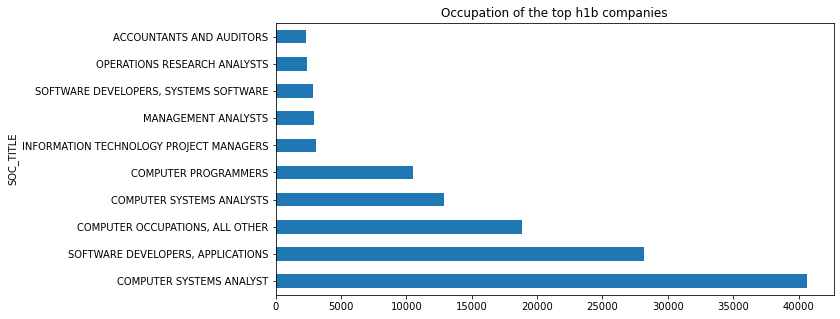

In [352]:
top = df1.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).index.tolist()
top_df = df1.loc[df1.EMPLOYER_NAME.isin(top)]
top_df.groupby('SOC_TITLE').EMPLOYER_NAME.count().nlargest(10).plot(kind='barh',title='Occupation of the top h1b companies')

### Which employers file the most petitions ?

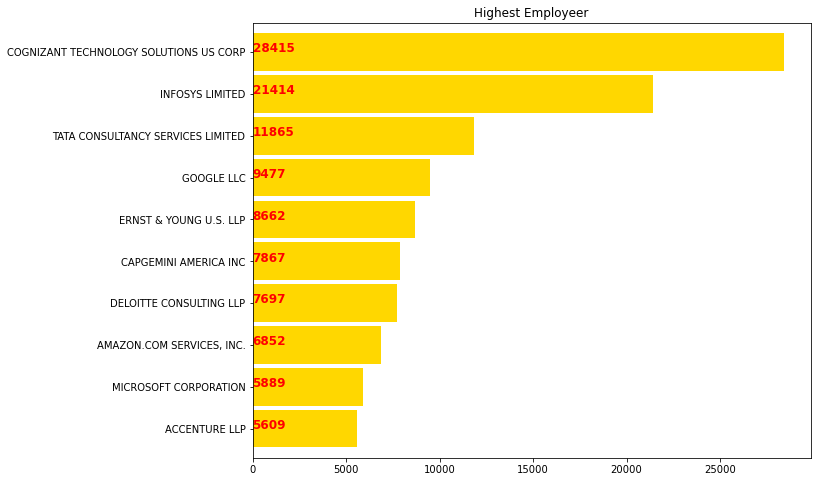

In [353]:
plt.figure(figsize=(10,8))
ax = df1['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:10].plot.barh(width=0.9,color='#ffd700')
for i, v in enumerate(df['EMPLOYER_NAME'].value_counts().sort_values(ascending=False).values[:10]): 
    ax.text(.8, i, v,fontsize=12,color='r',weight='bold')
plt.title('Highest Employeer')
fig=plt.gca()
fig.invert_yaxis()
plt.show()

###  WAGE DISTRIBUTION -

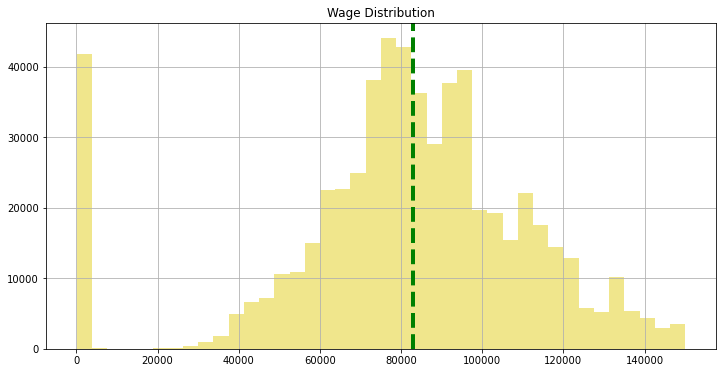

In [354]:
plt.figure(figsize=(12,6))
df1[df1['PREVAILING_WAGE_1']<150000].PREVAILING_WAGE_1.hist(bins=40,color='khaki')
plt.axvline(df[df['PREVAILING_WAGE_1']<=150000].PREVAILING_WAGE_1.median(), color='green', linestyle='dashed', linewidth=4)
plt.title('Wage Distribution')
plt.show()

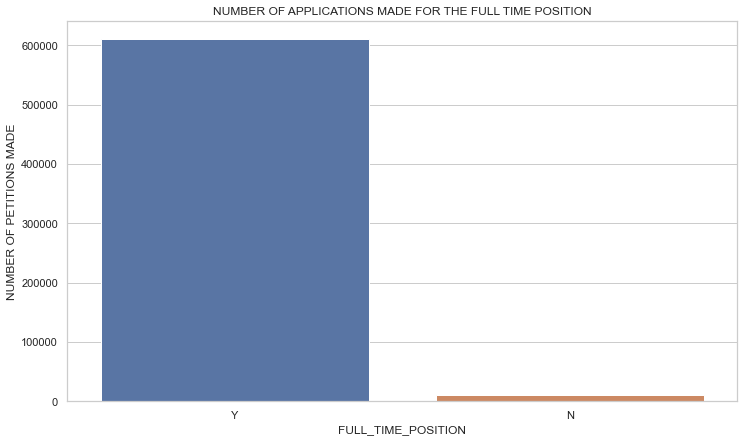

In [355]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = df1)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()

<AxesSubplot:>

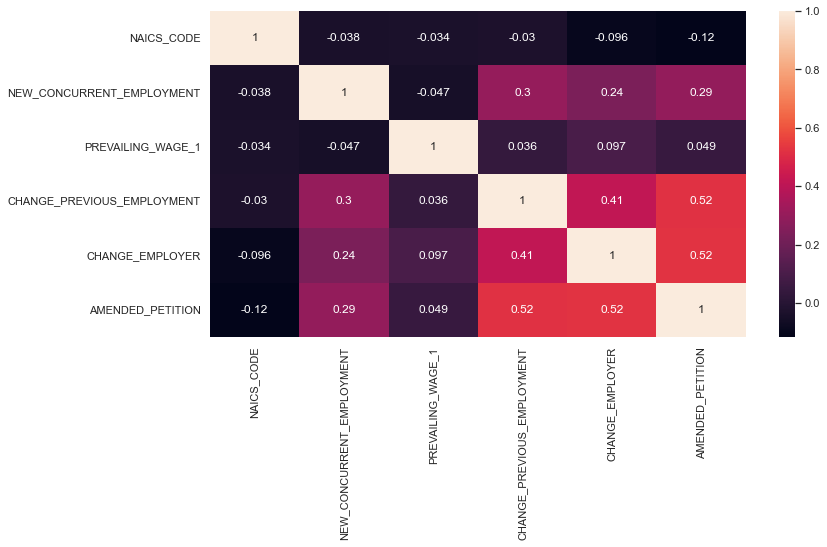

In [356]:
cor = df1.corr()

plt.figure(figsize=(12,6))
sns.heatmap(cor, annot = True)

In [357]:
df1.isnull().sum()

CASE_NUMBER                             0
CASE_STATUS                             0
EMPLOYER_NAME                           6
SECONDARY_ENTITY_1                  53118
AGENT_REPRESENTING_EMPLOYER             6
PERIOD_OF_EMPLOYMENT_START_DATE         0
JOB_TITLE                               1
SOC_TITLE                               4
SOC_CODE                                4
NAICS_CODE                              1
FULL_TIME_POSITION                      0
NEW_CONCURRENT_EMPLOYMENT               1
PREVAILING_WAGE_1                    4894
CONTINUED_EMPLOYMENT                    0
CHANGE_PREVIOUS_EMPLOYMENT              0
CHANGE_EMPLOYER                         0
AMENDED_PETITION                        0
H-1B_DEPENDENT                         22
SUPPORT_H1B                        390907
WILLFUL_VIOLATOR                       22
WAGE_RATE_OF_PAY_FROM_1                 7
WAGE_UNIT_OF_PAY_1                      7
dtype: int64

# FEATURE ENGINEERING 

In [358]:
df1['CASE_STATUS'] = df1['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2, 'WITHDRAWN' : 3})

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\4257070025.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [359]:
df1.AGENT_REPRESENTING_EMPLOYER.value_counts(dropna = False)

Y      436014
N      185447
NaN         6
Name: AGENT_REPRESENTING_EMPLOYER, dtype: int64

In [360]:
df1.WILLFUL_VIOLATOR.value_counts(dropna = False)

N      621171
Y         274
NaN        22
Name: WILLFUL_VIOLATOR, dtype: int64

In [361]:
df1['FULL_TIME_POSITION'] = df1['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
df1['AGENT_REPRESENTING_EMPLOYER'] = df1['AGENT_REPRESENTING_EMPLOYER'].map({'N' : 0, 'Y' : 1})
df1['SECONDARY_ENTITY_1'] = df1['SECONDARY_ENTITY_1'].map({'N' : 0, 'Y' : 1})
df1['H-1B_DEPENDENT'] = df1['H-1B_DEPENDENT'].map({'N' : 0, 'Y' : 1})
df1['WILLFUL_VIOLATOR'] = df1['WILLFUL_VIOLATOR'].map({'N' : 0, 'Y' : 1})

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\864472983.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\864472983.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\864472983.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [362]:
df1['AGENT_REPRESENTING_EMPLOYER'] = df1['AGENT_REPRESENTING_EMPLOYER'].fillna(df1['AGENT_REPRESENTING_EMPLOYER'].mode()[0])
df1['SECONDARY_ENTITY_1'] = df1['SECONDARY_ENTITY_1'].fillna(df1['SECONDARY_ENTITY_1'].mode()[0])
df1['H-1B_DEPENDENT'] = df1['H-1B_DEPENDENT'].fillna(df1['H-1B_DEPENDENT'].mode()[0])
df1['WILLFUL_VIOLATOR'] = df1['WILLFUL_VIOLATOR'].fillna(df1['WILLFUL_VIOLATOR'].mode()[0])
df1['EMPLOYER_NAME'] = df1['EMPLOYER_NAME'].fillna(df1['EMPLOYER_NAME'].mode()[0])
df1['JOB_TITLE'] = df1['JOB_TITLE'].fillna(df1['JOB_TITLE'].mode()[0])
df1['SOC_CODE'] = df1['SOC_CODE'].fillna(df1['SOC_CODE'].mode()[0])
df1['NAICS_CODE'] = df1['NAICS_CODE'].fillna(df1['NAICS_CODE'].mode()[0])
df1['SOC_CODE'] = df1['SOC_CODE'].fillna(df1['SOC_CODE'].mode()[0])
df1['NEW_CONCURRENT_EMPLOYMENT'] = df1['NEW_CONCURRENT_EMPLOYMENT'].fillna(df1['NEW_CONCURRENT_EMPLOYMENT'].mode()[0])
df1['WAGE_UNIT_OF_PAY_1'] = df1['WAGE_UNIT_OF_PAY_1'].fillna(df1['WAGE_UNIT_OF_PAY_1'].mode()[0])

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\3040335219.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\3040335219.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\3040335219.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [363]:
df1.isnull().sum()

CASE_NUMBER                             0
CASE_STATUS                             0
EMPLOYER_NAME                           0
SECONDARY_ENTITY_1                      0
AGENT_REPRESENTING_EMPLOYER             0
PERIOD_OF_EMPLOYMENT_START_DATE         0
JOB_TITLE                               0
SOC_TITLE                               4
SOC_CODE                                0
NAICS_CODE                              0
FULL_TIME_POSITION                      0
NEW_CONCURRENT_EMPLOYMENT               0
PREVAILING_WAGE_1                    4894
CONTINUED_EMPLOYMENT                    0
CHANGE_PREVIOUS_EMPLOYMENT              0
CHANGE_EMPLOYER                         0
AMENDED_PETITION                        0
H-1B_DEPENDENT                          0
SUPPORT_H1B                        390907
WILLFUL_VIOLATOR                        0
WAGE_RATE_OF_PAY_FROM_1                 7
WAGE_UNIT_OF_PAY_1                      0
dtype: int64

In [364]:
df1['H-1B_DEPENDENT'].value_counts()

0.0    391173
1.0    230294
Name: H-1B_DEPENDENT, dtype: int64

In [365]:
df1['NEW_CONCURRENT_EMP'] = df1['NEW_CONCURRENT_EMPLOYMENT']
df1['NEW_CONCURRENT_EMP'] = np.where(df1['NEW_CONCURRENT_EMP'].isin([0]), '0',
                             np.where(df1['NEW_CONCURRENT_EMP'].isin([1]), '1', '>1'))

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\502943668.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\502943668.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [366]:
df1['CHANGE_PREVIOUS_EMP'] = df1['CHANGE_PREVIOUS_EMPLOYMENT']
df1['CHANGE_PREVIOUS_EMP'] = np.where(df1['CHANGE_PREVIOUS_EMPLOYMENT'].isin([0]), '0',
                             np.where(df1['CHANGE_PREVIOUS_EMPLOYMENT'].isin([1]), '1', '>1'))

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\628314221.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\628314221.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [367]:
df1['CONTINUED_EMPLOYMENT_BIN'] = df1['CONTINUED_EMPLOYMENT']
df1['CONTINUED_EMPLOYMENT_BIN'] = np.where(df1['CONTINUED_EMPLOYMENT'].isin([0]), '0',
                             np.where(df1['CONTINUED_EMPLOYMENT'].isin([1]), '1', '>1'))

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\1080595885.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\1080595885.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [368]:
df1['AMENDED_PETITION_BIN'] = df1['AMENDED_PETITION']
df1['AMENDED_PETITION_BIN'] = np.where(df1['AMENDED_PETITION'].isin([0]), '0',
                             np.where(df1['AMENDED_PETITION'].isin([1]), '1', '>1'))

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\3459707139.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\3459707139.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [369]:
df1['CHANGE_EMPLOYER_BIN'] = df1['CHANGE_EMPLOYER']
df1['CHANGE_EMPLOYER_BIN'] = np.where(df1['CHANGE_EMPLOYER'].isin([0]), '0',
                             np.where(df1['CHANGE_EMPLOYER'].isin([1]), '1', '>1'))

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\4098773429.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\4098773429.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [370]:
df1.AMENDED_PETITION_BIN.value_counts()

0     529488
1      79641
>1     12338
Name: AMENDED_PETITION_BIN, dtype: int64

In [371]:
df1['PREVAILING_WAGE_1'].value_counts(dropna = False)

109242.0    8251
96366.0     7601
93538.0     5426
113318.0    5191
NaN         4894
            ... 
92975.0        1
159723.0       1
96245.0        1
120508.0       1
109820.0       1
Name: PREVAILING_WAGE_1, Length: 25061, dtype: int64

In [372]:
q1 = df1["PREVAILING_WAGE_1"].quantile(0.25)
q3 = df1["PREVAILING_WAGE_1"].quantile(0.75)
IQR = q3 - q1
mean = df1['PREVAILING_WAGE_1'].mean()

In [373]:
df1['PREVAILING_WAGE_1'] = df1['PREVAILING_WAGE_1'].apply(lambda x: x if x != None and (x <= q1 + 1.5*IQR and x >= q1 - 1.5*IQR) else mean)

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\2327138901.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1440x1440 with 0 Axes>

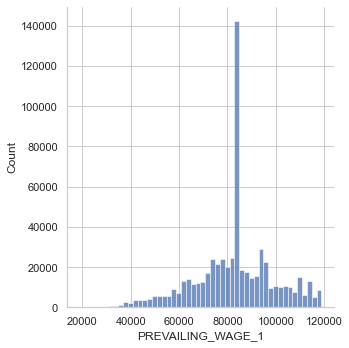

In [374]:
plt.figure(figsize=(20,20))
sns.displot(df1['PREVAILING_WAGE_1'], bins = 50)

<AxesSubplot:>

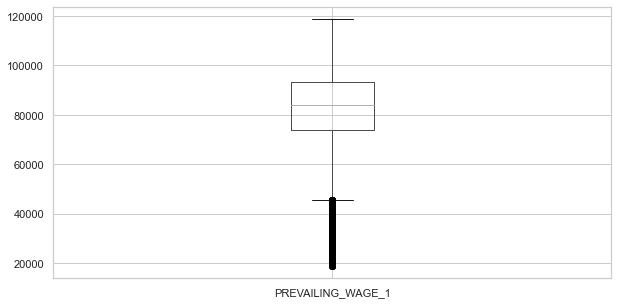

In [375]:
df1.boxplot(column='PREVAILING_WAGE_1')

In [376]:
df1.isnull().sum()

CASE_NUMBER                             0
CASE_STATUS                             0
EMPLOYER_NAME                           0
SECONDARY_ENTITY_1                      0
AGENT_REPRESENTING_EMPLOYER             0
PERIOD_OF_EMPLOYMENT_START_DATE         0
JOB_TITLE                               0
SOC_TITLE                               4
SOC_CODE                                0
NAICS_CODE                              0
FULL_TIME_POSITION                      0
NEW_CONCURRENT_EMPLOYMENT               0
PREVAILING_WAGE_1                       0
CONTINUED_EMPLOYMENT                    0
CHANGE_PREVIOUS_EMPLOYMENT              0
CHANGE_EMPLOYER                         0
AMENDED_PETITION                        0
H-1B_DEPENDENT                          0
SUPPORT_H1B                        390907
WILLFUL_VIOLATOR                        0
WAGE_RATE_OF_PAY_FROM_1                 7
WAGE_UNIT_OF_PAY_1                      0
NEW_CONCURRENT_EMP                      0
CHANGE_PREVIOUS_EMP               

In [377]:
df1.SOC_TITLE.value_counts()

SOFTWARE DEVELOPERS, APPLICATIONS        206446
COMPUTER OCCUPATIONS, ALL OTHER           54387
COMPUTER SYSTEMS ANALYST                  40796
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE     30162
COMPUTER SYSTEMS ANALYSTS                 29809
                                          ...  
WATER / WASTEWATER ENGINEER                   1
WATER/WASTEWATER ENGINEERS                    1
ELECTRICAL ENGINEERS, NON R&D                 1
17-2072                                       1
15-2031                                       1
Name: SOC_TITLE, Length: 832, dtype: int64

In [378]:
df1['OCCUPATION'] = np.nan
df1['SOC_TITLE'] = df1['SOC_TITLE'].str.lower()
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('computer','programmer', na=False)] = 'Computer Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('software','web developer', na=False)] = 'Computer Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('database', na=False)] = 'Computer Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('math','statistic', na=False)] = 'Mathematical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('predictive model','stats', na=False)] = 'Mathematical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('teacher','linguist', na=False)] = 'Education Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('professor','Teach', na=False)] = 'Education Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('school principal', na=False)] = 'Education Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('medical','doctor', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('physician','dentist', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('Health','Physical Therapists', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('surgeon','nurse', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('psychiatry', na=False)] = 'Medical Occupations'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('chemist','physicist', na=False)] = 'Advance Sciences'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('biology','scientist', na=False)] = 'Advance Sciences'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('biologi','clinical research', na=False)] = 'Advance Sciences'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('public relation','manage', na=False)] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('management','operation', na=False)] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('chief','plan', na=False)] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('executive', na=False)] = 'Management Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('advertis','marketing', na=False)] = 'Marketing Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('promotion','market research', na=False)] = 'Marketing Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('business','business analyst', na=False)] = 'Business Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('business systems analyst', na=False)] = 'Business Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('accountant','finance', na=False)] = 'Financial Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('financial', na=False)] = 'Financial Occupation'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('engineer','architect', na=False)] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('surveyor','carto', na=False)] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('technician','drafter', na=False)] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('information security','information tech', na=False)] = 'Architecture & Engineering'
df1.OCCUPATION[df1['SOC_TITLE'].str.contains('education','law', na=False)] = 'Administrative Occupation'

df1['OCCUPATION']= df1.OCCUPATION.replace(np.nan, 'Others', regex=True)

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\3338384415.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\3338384415.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\3338384415.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [379]:
df1.OCCUPATION.value_counts(dropna = False)

Computer Occupations          411602
Others                         76964
Architecture & Engineering     61600
Financial Occupation           24651
Medical Occupations            11859
Management Occupation          11024
Advance Sciences                9728
Education Occupations           7769
Administrative Occupation       3636
Business Occupation             1856
Mathematical Occupations         576
Marketing Occupation             202
Name: OCCUPATION, dtype: int64

In [380]:
df1.head()

,CASE_NUMBER,CASE_STATUS,EMPLOYER_NAME,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,PERIOD_OF_EMPLOYMENT_START_DATE,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,FULL_TIME_POSITION,NEW_CONCURRENT_EMPLOYMENT,PREVAILING_WAGE_1,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,NEW_CONCURRENT_EMP,CHANGE_PREVIOUS_EMP,CONTINUED_EMPLOYMENT_BIN,AMENDED_PETITION_BIN,CHANGE_EMPLOYER_BIN,OCCUPATION
6,I-200-18289-307616,3,MH SUB I LLC,0.0,1.0,03/07/2019,DIRECTOR OF BUSINESS DEVELOPMENT,advertising and promotions managers,11-2011,454111.0,1,0.0,97365.000000,0,1.0,0.0,0.0,0.0,NaN,0.0,100000,Year,0,1,>1,0,0,Marketing Occupation
7,I-200-19015-877040,3,"KIIP, INC.",0.0,1.0,27-05-2019,HEAD OF BUSINESS DEVELOPMENT,advertising and promotions managers,11-2011,541990.0,1,0.0,84142.860684,1,0.0,0.0,0.0,0.0,NaN,0.0,131685,Year,0,0,>1,0,0,Marketing Occupation
8,I-200-19031-693896,3,"SUNSHINE SACHS & ASSOCIATES WEST, LLC",0.0,1.0,23-02-2019,"ACCOUNT DIRECTOR, SOCIAL MEDIA",advertising and promotions managers,11-2011,541820.0,1,0.0,97365.000000,1,0.0,0.0,0.0,0.0,NaN,0.0,99750,Year,0,0,>1,0,0,Marketing Occupation
9,I-200-19056-659352,3,"SOLAREDGE TECHNOLOGIES, INC.",0.0,1.0,01-09-2019,PRODUCT MARKETING MANAGER,advertising and promotions managers,11-2011,334413.0,1,0.0,84142.860684,0,0.0,0.0,0.0,0.0,NaN,0.0,130000,Year,0,0,>1,0,0,Marketing Occupation
10,I-200-19066-002723,3,SOULSIGHT,0.0,1.0,06-09-2019,ASSOCIATE ACCOUNT STRATEGY MANAGER,advertising and promotions managers,11-2011,541430.0,1,0.0,47549.000000,0,0.0,0.0,0.0,0.0,NaN,0.0,50000,Year,0,0,>1,0,0,Marketing Occupation


In [381]:
df1.EMPLOYER_NAME.value_counts(dropna = False)

COGNIZANT TECHNOLOGY SOLUTIONS US CORP    28421
INFOSYS LIMITED                           21414
TATA CONSULTANCY SERVICES LIMITED         11865
GOOGLE LLC                                 9477
ERNST & YOUNG U.S. LLP                     8662
                                          ...  
ARCHITECTURAL INTELLIGENCE D.P.C.             1
TINA T. CHIANG ACCOUNTANCY CORP.              1
POGOSYAN CORPORATION                          1
NEW TANG DYNASTY TELEVISION                   1
CORNERSTONE CONTROLS INC.                     1
Name: EMPLOYER_NAME, Length: 63944, dtype: int64

In [382]:
df1['NEW_EMPLOYER'] = np.nan
df1.shape

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\89142871.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(621467, 29)

In [383]:
df1['EMPLOYER_NAME'] = df1['EMPLOYER_NAME'].str.lower()
df1.NEW_EMPLOYER[df1['EMPLOYER_NAME'].str.contains('university', na = False)] = 'university'
df1['NEW_EMPLOYER']= df1.NEW_EMPLOYER.replace(np.nan, 'non university', regex=True)

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\1735430067.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\1735430067.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\1735430067.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\U

In [384]:
df1.NEW_EMPLOYER.value_counts(dropna = False)

non university    599421
university         22046
Name: NEW_EMPLOYER, dtype: int64

In [385]:
df1['NEW_EMPLOYER'] = df1['NEW_EMPLOYER'].map({'university' : 1, 'non university' : 0})

C:\Users\Arpit Kumar Lariya\AppData\Local\Temp\ipykernel_24284\2223840766.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [386]:
df1.isnull().sum()

CASE_NUMBER                             0
CASE_STATUS                             0
EMPLOYER_NAME                           0
SECONDARY_ENTITY_1                      0
AGENT_REPRESENTING_EMPLOYER             0
PERIOD_OF_EMPLOYMENT_START_DATE         0
JOB_TITLE                               0
SOC_TITLE                               4
SOC_CODE                                0
NAICS_CODE                              0
FULL_TIME_POSITION                      0
NEW_CONCURRENT_EMPLOYMENT               0
PREVAILING_WAGE_1                       0
CONTINUED_EMPLOYMENT                    0
CHANGE_PREVIOUS_EMPLOYMENT              0
CHANGE_EMPLOYER                         0
AMENDED_PETITION                        0
H-1B_DEPENDENT                          0
SUPPORT_H1B                        390907
WILLFUL_VIOLATOR                        0
WAGE_RATE_OF_PAY_FROM_1                 7
WAGE_UNIT_OF_PAY_1                      0
NEW_CONCURRENT_EMP                      0
CHANGE_PREVIOUS_EMP               

In [387]:
df1.PERIOD_OF_EMPLOYMENT_START_DATE.value_counts()

01-09-2019    19619
01-08-2019    18937
01-07-2019    12219
10-09-2019     9587
02-09-2019     8708
              ...  
30-03-2020        1
07-11-2018        1
21-10-2018        1
09/01/2018        1
20-10-2018        1
Name: PERIOD_OF_EMPLOYMENT_START_DATE, Length: 794, dtype: int64

In [388]:
df1['YEAR'] = pd.DatetimeIndex(df1['PERIOD_OF_EMPLOYMENT_START_DATE']).year

C:\Users\Arpit Kumar Lariya\New folder\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning:

Parsing '27-05-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Arpit Kumar Lariya\New folder\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning:

Parsing '23-02-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Arpit Kumar Lariya\New folder\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning:

Parsing '17-09-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Arpit Kumar Lariya\New folder\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning:

Parsing '25-09-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\Arpit Kumar Lariya\New folder\lib\site-packages\pandas\core\indexes\dat

In [389]:
df1.isnull().sum()

CASE_NUMBER                             0
CASE_STATUS                             0
EMPLOYER_NAME                           0
SECONDARY_ENTITY_1                      0
AGENT_REPRESENTING_EMPLOYER             0
PERIOD_OF_EMPLOYMENT_START_DATE         0
JOB_TITLE                               0
SOC_TITLE                               4
SOC_CODE                                0
NAICS_CODE                              0
FULL_TIME_POSITION                      0
NEW_CONCURRENT_EMPLOYMENT               0
PREVAILING_WAGE_1                       0
CONTINUED_EMPLOYMENT                    0
CHANGE_PREVIOUS_EMPLOYMENT              0
CHANGE_EMPLOYER                         0
AMENDED_PETITION                        0
H-1B_DEPENDENT                          0
SUPPORT_H1B                        390907
WILLFUL_VIOLATOR                        0
WAGE_RATE_OF_PAY_FROM_1                 7
WAGE_UNIT_OF_PAY_1                      0
NEW_CONCURRENT_EMP                      0
CHANGE_PREVIOUS_EMP               

In [390]:
df1.shape

(621467, 30)

In [391]:
df1 = df1.drop(['CASE_NUMBER','SUPPORT_H1B', 'SOC_TITLE', 'EMPLOYER_NAME', 'PERIOD_OF_EMPLOYMENT_START_DATE'], axis = 1)

In [392]:
df1 = df1.drop('NEW_CONCURRENT_EMPLOYMENT', axis = 1)

In [393]:
df1 = df1.drop('JOB_TITLE', axis = 1)

In [394]:
df1 = df1.drop('SOC_CODE', axis = 1)

In [395]:
df1 = df1.drop('NAICS_CODE', axis = 1)

In [396]:
df1 = df1.drop('CHANGE_PREVIOUS_EMPLOYMENT', axis = 1)

In [397]:
df1 = df1.drop('CONTINUED_EMPLOYMENT', axis = 1)

In [398]:
df1 = df1.drop('AMENDED_PETITION', axis = 1)

In [399]:
df1 = df1.drop('CHANGE_EMPLOYER', axis = 1)

In [400]:
df1 = df1.drop('WAGE_RATE_OF_PAY_FROM_1', axis = 1)

In [401]:
df1.head()

,CASE_STATUS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,FULL_TIME_POSITION,PREVAILING_WAGE_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WAGE_UNIT_OF_PAY_1,NEW_CONCURRENT_EMP,CHANGE_PREVIOUS_EMP,CONTINUED_EMPLOYMENT_BIN,AMENDED_PETITION_BIN,CHANGE_EMPLOYER_BIN,OCCUPATION,NEW_EMPLOYER,YEAR
6,3,0.0,1.0,1,97365.000000,0.0,0.0,Year,0,1,>1,0,0,Marketing Occupation,0,2019
7,3,0.0,1.0,1,84142.860684,0.0,0.0,Year,0,0,>1,0,0,Marketing Occupation,0,2019
8,3,0.0,1.0,1,97365.000000,0.0,0.0,Year,0,0,>1,0,0,Marketing Occupation,0,2019
9,3,0.0,1.0,1,84142.860684,0.0,0.0,Year,0,0,>1,0,0,Marketing Occupation,0,2019
10,3,0.0,1.0,1,47549.000000,0.0,0.0,Year,0,0,>1,0,0,Marketing Occupation,0,2019


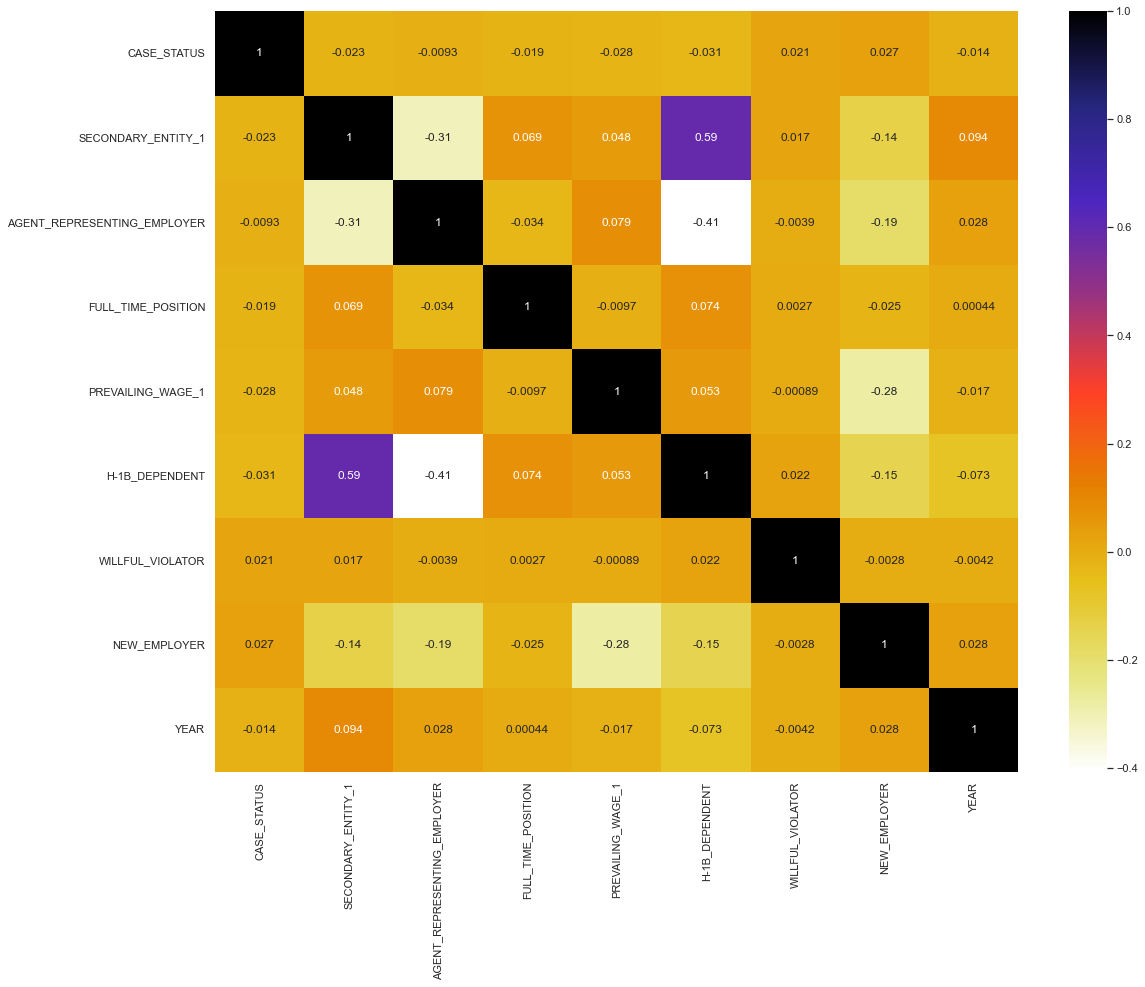

In [402]:
import seaborn as sns
plt.figure(figsize=(18, 14))
cor = df1.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [403]:
df1.dtypes

CASE_STATUS                      int64
SECONDARY_ENTITY_1             float64
AGENT_REPRESENTING_EMPLOYER    float64
FULL_TIME_POSITION               int64
PREVAILING_WAGE_1              float64
H-1B_DEPENDENT                 float64
WILLFUL_VIOLATOR               float64
WAGE_UNIT_OF_PAY_1              object
NEW_CONCURRENT_EMP              object
CHANGE_PREVIOUS_EMP             object
CONTINUED_EMPLOYMENT_BIN        object
AMENDED_PETITION_BIN            object
CHANGE_EMPLOYER_BIN             object
OCCUPATION                      object
NEW_EMPLOYER                     int64
YEAR                             int64
dtype: object

In [404]:
# df1['WAGE_RATE_OF_PAY_FROM_1'] = df1['WAGE_RATE_OF_PAY_FROM_1'].str.replace("[^0-9]", "", regex=True)

In [405]:
# df1['WAGE_RATE_OF_PAY_FROM_1'] = df1['WAGE_RATE_OF_PAY_FROM_1'].astype(float)

In [406]:
# df1 = df1.dropna(subset=['WAGE_RATE_OF_PAY_FROM_1'])

In [407]:
# df1['WAGE_RATE_OF_PAY_FROM_1'].isnull().sum()

In [408]:
df1.head()

,CASE_STATUS,SECONDARY_ENTITY_1,AGENT_REPRESENTING_EMPLOYER,FULL_TIME_POSITION,PREVAILING_WAGE_1,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WAGE_UNIT_OF_PAY_1,NEW_CONCURRENT_EMP,CHANGE_PREVIOUS_EMP,CONTINUED_EMPLOYMENT_BIN,AMENDED_PETITION_BIN,CHANGE_EMPLOYER_BIN,OCCUPATION,NEW_EMPLOYER,YEAR
6,3,0.0,1.0,1,97365.000000,0.0,0.0,Year,0,1,>1,0,0,Marketing Occupation,0,2019
7,3,0.0,1.0,1,84142.860684,0.0,0.0,Year,0,0,>1,0,0,Marketing Occupation,0,2019
8,3,0.0,1.0,1,97365.000000,0.0,0.0,Year,0,0,>1,0,0,Marketing Occupation,0,2019
9,3,0.0,1.0,1,84142.860684,0.0,0.0,Year,0,0,>1,0,0,Marketing Occupation,0,2019
10,3,0.0,1.0,1,47549.000000,0.0,0.0,Year,0,0,>1,0,0,Marketing Occupation,0,2019


In [409]:
df1[['CASE_STATUS', 'SECONDARY_ENTITY_1', 'AGENT_REPRESENTING_EMPLOYER', 'FULL_TIME_POSITION','H-1B_DEPENDENT', 
     'WILLFUL_VIOLATOR', 'WAGE_UNIT_OF_PAY_1', 'NEW_CONCURRENT_EMP', 'CHANGE_PREVIOUS_EMP', 'CONTINUED_EMPLOYMENT_BIN', 'AMENDED_PETITION_BIN', 
     'CHANGE_EMPLOYER_BIN', 'OCCUPATION', 'NEW_EMPLOYER', 'YEAR']] = df1[['CASE_STATUS', 'SECONDARY_ENTITY_1', 'AGENT_REPRESENTING_EMPLOYER', 'FULL_TIME_POSITION','H-1B_DEPENDENT', 
     'WILLFUL_VIOLATOR', 'WAGE_UNIT_OF_PAY_1', 'NEW_CONCURRENT_EMP', 'CHANGE_PREVIOUS_EMP', 'CONTINUED_EMPLOYMENT_BIN', 'AMENDED_PETITION_BIN', 
     'CHANGE_EMPLOYER_BIN', 'OCCUPATION', 'NEW_EMPLOYER', 'YEAR']] .apply(lambda x: x.astype('category'))

In [410]:
df1.dtypes

CASE_STATUS                    category
SECONDARY_ENTITY_1             category
AGENT_REPRESENTING_EMPLOYER    category
FULL_TIME_POSITION             category
PREVAILING_WAGE_1               float64
H-1B_DEPENDENT                 category
WILLFUL_VIOLATOR               category
WAGE_UNIT_OF_PAY_1             category
NEW_CONCURRENT_EMP             category
CHANGE_PREVIOUS_EMP            category
CONTINUED_EMPLOYMENT_BIN       category
AMENDED_PETITION_BIN           category
CHANGE_EMPLOYER_BIN            category
OCCUPATION                     category
NEW_EMPLOYER                   category
YEAR                           category
dtype: object

In [411]:
y = df1.CASE_STATUS
X = df1.drop('CASE_STATUS', axis = 1)

seed = 7
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train.columns

Index(['SECONDARY_ENTITY_1', 'AGENT_REPRESENTING_EMPLOYER',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE_1', 'H-1B_DEPENDENT',
       'WILLFUL_VIOLATOR', 'WAGE_UNIT_OF_PAY_1', 'NEW_CONCURRENT_EMP',
       'CHANGE_PREVIOUS_EMP', 'CONTINUED_EMPLOYMENT_BIN',
       'AMENDED_PETITION_BIN', 'CHANGE_EMPLOYER_BIN', 'OCCUPATION',
       'NEW_EMPLOYER', 'YEAR'],
      dtype='object')

In [412]:
X_train.isnull().sum()


SECONDARY_ENTITY_1             0
AGENT_REPRESENTING_EMPLOYER    0
FULL_TIME_POSITION             0
PREVAILING_WAGE_1              0
H-1B_DEPENDENT                 0
WILLFUL_VIOLATOR               0
WAGE_UNIT_OF_PAY_1             0
NEW_CONCURRENT_EMP             0
CHANGE_PREVIOUS_EMP            0
CONTINUED_EMPLOYMENT_BIN       0
AMENDED_PETITION_BIN           0
CHANGE_EMPLOYER_BIN            0
OCCUPATION                     0
NEW_EMPLOYER                   0
YEAR                           0
dtype: int64

In [413]:
X_train_encode = pd.get_dummies(X_train)
X_test_encode = pd.get_dummies(X_test)

In [414]:
X_train_encode.head()

,PREVAILING_WAGE_1,SECONDARY_ENTITY_1_0.0,SECONDARY_ENTITY_1_1.0,AGENT_REPRESENTING_EMPLOYER_0.0,AGENT_REPRESENTING_EMPLOYER_1.0,FULL_TIME_POSITION_0,FULL_TIME_POSITION_1,H-1B_DEPENDENT_0.0,H-1B_DEPENDENT_1.0,WILLFUL_VIOLATOR_0.0,WILLFUL_VIOLATOR_1.0,WAGE_UNIT_OF_PAY_1_Bi-Weekly,WAGE_UNIT_OF_PAY_1_Hour,WAGE_UNIT_OF_PAY_1_Month,WAGE_UNIT_OF_PAY_1_Week,WAGE_UNIT_OF_PAY_1_Year,NEW_CONCURRENT_EMP_0,NEW_CONCURRENT_EMP_1,NEW_CONCURRENT_EMP_>1,CHANGE_PREVIOUS_EMP_0,CHANGE_PREVIOUS_EMP_1,CHANGE_PREVIOUS_EMP_>1,CONTINUED_EMPLOYMENT_BIN_>1,AMENDED_PETITION_BIN_0,AMENDED_PETITION_BIN_1,AMENDED_PETITION_BIN_>1,CHANGE_EMPLOYER_BIN_0,CHANGE_EMPLOYER_BIN_1,CHANGE_EMPLOYER_BIN_>1,OCCUPATION_Administrative Occupation,OCCUPATION_Advance Sciences,OCCUPATION_Architecture & Engineering,OCCUPATION_Business Occupation,OCCUPATION_Computer Occupations,OCCUPATION_Education Occupations,OCCUPATION_Financial Occupation,OCCUPATION_Management Occupation,OCCUPATION_Marketing Occupation,OCCUPATION_Mathematical Occupations,OCCUPATION_Medical Occupations,OCCUPATION_Others,NEW_EMPLOYER_0,NEW_EMPLOYER_1,YEAR_2017,YEAR_2018,YEAR_2019,YEAR_2020
73368,80517.0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
485914,101712.0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
595439,101338.0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
425047,101067.0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
36137,67850.0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [415]:
y_train.head()

73368     0
485914    0
595439    0
425047    0
36137     0
Name: CASE_STATUS, dtype: category
Categories (4, int64): [0, 1, 2, 3]